# Das Standardbeispiel für neuronale Netzwerke
## Erkennen von handgeschriebenen Ziffern
MNIST ist eine Datenbank, in der zehntausende handgeschriebene Zahlen eingescannt und bezeichnet sind. Diese Daten eignen sich zum Trainieren und Testen von neuronalen Netzwerken

[Link zum Wiki](https://de.wikipedia.org/wiki/MNIST-Datenbank)<br>
[Link zur Datenbank](https://yann.lecun.com/exdb/mnist/)<br>
<a href="http://neuralnetworksanddeeplearning.com/"> Link zu Michael Nielsons Buch</a><br>
<a href="https://www.youtube.com/watch?v=aircAruvnKk">3Blue1Brown: Neural Networks</a>

In [4]:
import  mnist_loader
from matplotlib import pyplot as plt
import network
import numpy as np

/home/jmartin/PycharmProjects/NeuralNetworkForSchool/network.py:138: SyntaxWarning: invalid escape sequence '\p'
  """Return the vector of partial derivatives \partial C_x /


In [25]:
training_data,validation_data,test_data = mnist_loader.load_data_wrapper()

In [26]:
training_data=list(training_data)
validation_data=list(validation_data)
test_data=list(test_data)

In [7]:
print(len(training_data))
print(len(validation_data))
print(len(test_data))
print(training_data[0])

50000
10000
10000
(array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.     

Aus der Dokumentation der MNIST-Datenbank kann man erfahren, dass die Ziffern als 28x28 Graustufenbilder gespeichert sind.

**Erste Aufgabe:** Mache Beispiele der Trainingsdaten und deren Label sichtbar. Gib zum Beispiel 10 zufällige Datenbeispiele aus. (Warnung: Das resizing zerstört die Daten. Zum Netzwerktraining Daten neu laden.)

In [21]:
i=48
# print(training_data[i])
print(training_data[i][1])
training_data[i][0].resize(28,28)
#print(training_data[i][0])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


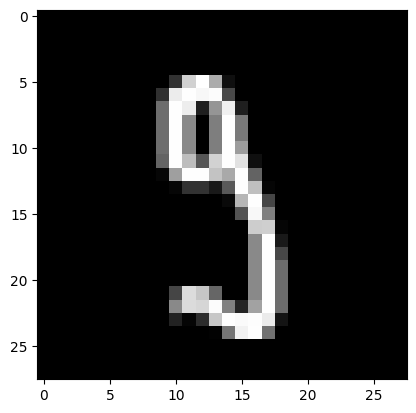

label:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [22]:
plt.imshow(training_data[i][0], cmap='gray', vmin=0, vmax=1)
plt.show()
print("label:\n",training_data[i][1])

**Zweite Aufgabe:** Schreibe eine kleine Funktion, die statt des Arrays, die entsprechende Ziffer zurückgibt.

In [13]:
def label(array):
    for i in range(10):
        if array[i]==1:
            return i

In [14]:
label(training_data[i][1])

1

## Erstellung eines Netzwerks, Training und Test
Ihr werdet gleich im Video sehen, was ein neuronales Netzwerk ist. Für den Moment ist es eine Black-Box, die 28x28=784 Grauwerte einliest und eine Zahl zwischen 0 und 9 wieder ausspuckt. Dafür benötigt das Netzwerk 784 Eingänge und 10 Ausgänge. Zusätzlich fügen wir noch 30 interne Gehirnzellen hinzu, die das Netzwerk komplexer und leistungsfähiger machen.

In [17]:
net = network.Network([784,30,10])
net.SGD(training_data, epochs = 3,mini_batch_size= 10,eta = 3.0, test_data=test_data)

Epoch 0 : 9061 / 10000
Epoch 1 : 9203 / 10000
Epoch 2 : 9233 / 10000


Wir testen einfach mal, wie gut das Netzwerk unsere Zahlen erkennen kann.

In [32]:
net.evaluate(validation_data)

9488

In [18]:
# Finde Falschklassifizierungen
for i in range(0,400):
    ergebnis = np.argmax(net.feedforward(training_data[i][0]))
    lbl  = label(training_data[i][1])
    if ergebnis!=lbl:
        print(i,ergebnis,lbl)

24 5 1
48 5 9
70 2 1
80 0 9
86 7 3
132 3 5
134 8 1
138 0 5
148 4 7
160 4 8
172 7 9
178 0 2
180 7 2
212 9 7
224 7 1
228 5 3
240 1 8
254 5 3
264 4 9
268 7 2
278 0 5
304 7 9
346 3 9
370 1 7
374 4 9


In [20]:
net.feedforward(training_data[48][0])

array([[3.22838253e-04],
       [1.00810149e-04],
       [6.50952492e-06],
       [3.22587091e-02],
       [7.09552365e-08],
       [3.28043642e-02],
       [1.77454327e-07],
       [2.36405327e-04],
       [9.46509415e-03],
       [6.61773977e-04]])

## Alternatives Netzwerk aus Video

In [31]:
# mit 2 hidden Layern mit jeweils 30 Neuronen schafft man fast 95 Prozent
# Anzahl der Parameter: 784x30+30+30x30+30+30x10 approx 25k

net = network.Network([784,30,30,10])
net.SGD(training_data, epochs = 10,mini_batch_size= 10,eta = 3.0, test_data=test_data)
net.evaluate(validation_data)

Epoch 0 : 9063 / 10000
Epoch 1 : 9237 / 10000
Epoch 2 : 9302 / 10000
Epoch 3 : 9387 / 10000
Epoch 4 : 9415 / 10000
Epoch 5 : 9379 / 10000
Epoch 6 : 9407 / 10000
Epoch 7 : 9473 / 10000
Epoch 8 : 9453 / 10000
Epoch 9 : 9439 / 10000
